In [37]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/small projects/stock market using Linear/data/sp500.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [4]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_20132\3023999556.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date']=pd.to_datetime(df['Date'])


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [6]:
df ['Tommorow']= df['Close'].shift(-1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24594 entries, 0 to 24593
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24594 non-null  object 
 1   Open          24594 non-null  float64
 2   High          24594 non-null  float64
 3   Low           24594 non-null  float64
 4   Close         24594 non-null  float64
 5   Volume        24594 non-null  int64  
 6   Dividends     24594 non-null  float64
 7   Stock Splits  24594 non-null  float64
 8   Tommorow      24593 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dropna()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...,...
24588,2025-11-19 00:00:00-05:00,6625.839844,6689.750000,6603.500000,6642.160156,5021610000,0.0,0.0,6538.759766
24589,2025-11-20 00:00:00-05:00,6737.930176,6770.350098,6534.049805,6538.759766,5596080000,0.0,0.0,6602.990234
24590,2025-11-21 00:00:00-05:00,6555.770020,6660.049805,6521.919922,6602.990234,5929930000,0.0,0.0,6705.120117
24591,2025-11-24 00:00:00-05:00,6636.540039,6715.750000,6630.700195,6705.120117,6039740000,0.0,0.0,6765.879883


In [27]:
df.dropna(inplace=True)

In [ ]:
X=df.drop(['Tommorow','Date','Dividends','Stock Splits'],axis=1)
y=df['Tommorow']

In [51]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [53]:
model_lin=LinearRegression()

In [58]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred_lin=model_lin.predict(X_test)

In [60]:
mean_squared_error(y_test,y_pred_lin)

257.6516604172249

In [61]:
r2_score(y_test,y_pred_lin)

0.9998201622131261

In [62]:
root_mean_squared_error(y_test,y_pred_lin)

16.05153140411297

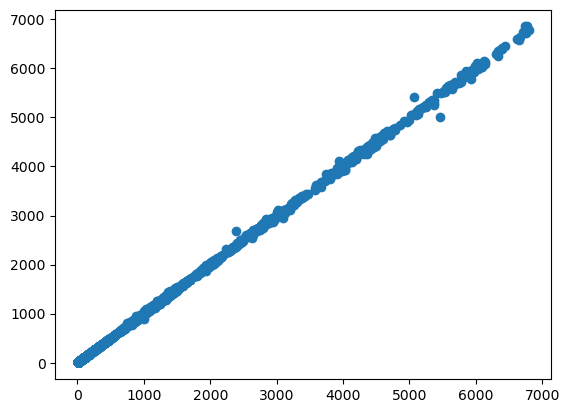

In [63]:
plt.scatter(y_test,y_pred_lin)

In [72]:
model_rf=RandomForestRegressor()


In [65]:
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [66]:
y_pred_rf=model_rf.predict(X_test)

In [67]:
mean_squared_error(y_test,y_pred_rf)

304.491015860358

In [68]:
root_mean_squared_error(y_test,y_pred_rf)

17.449670938454915

In [48]:
r2_score(y_test,y_pred_rf)

0.9997869124298855

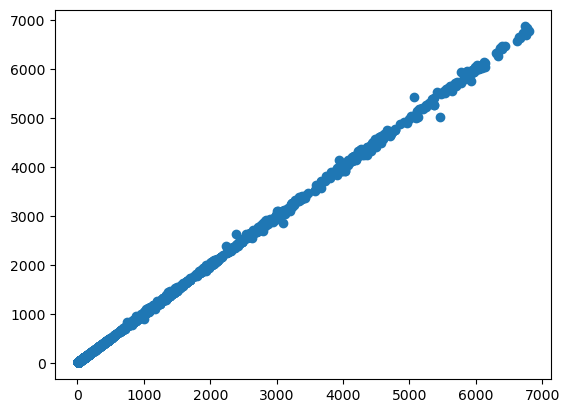

In [49]:
plt.scatter(y_test,y_pred_rf)

In [69]:
model_Xg=XGBRegressor()
model_Xg.fit(X_train,y_train)
y_pred_xg=model_Xg.predict(X_test)

691.527757997897 26.296915370398427 0.9995173218703157


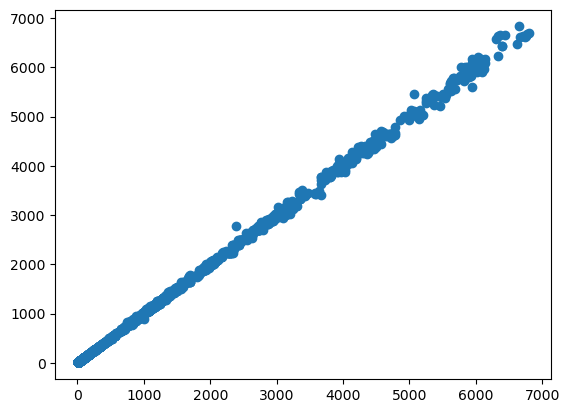

In [70]:
print(mean_squared_error(y_test,y_pred_xg),root_mean_squared_error(y_test,y_pred_xg),r2_score(y_test,y_pred_xg))
plt.scatter(y_test,y_pred_xg)